In [183]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')

data1 = data.drop(['Id', 'MSZoning', 'Street', 'Alley', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinSF2','LotShape', 'LandContour', 'BsmtFinType2','FireplaceQu' ,'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual', 'Functional','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition'], axis = 1)
data1.loc[np.isnan(data1["LotFrontage"]), 'LotFrontage'] = 0
data1.loc[np.isnan(data1["LotArea"]), 'LotArea'] = 0
data1.loc[np.isnan(data1["GarageYrBlt"]), 'GarageYrBlt'] = 0
print(data1)       

 

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
6             20         75.0    10084            8            5       2004   
7             60          0.0    10382            7            6       1973   
8             50         51.0     6120            7            5       1931   
9            190         50.0     7420            5            6       1939   
10            20         70.0    11200            5            5       1965   
11            60         85.0    11924            9 

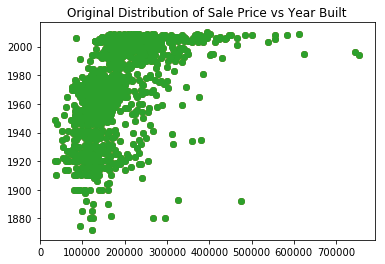

In [184]:
year = data['YearBuilt']

year_before_1960 = 0
year_before_2000 = 0
year_after_2000 = 0

for i in range(len(year)):
    if year[i] < 1960:
        year_before_1960 +=1
    if year[i] < 2000:
        year_before_2000 +=1
    if year[i] > 2000:
        year_after_2000 += 1
        
for i in range(3):
    if i == 0:
        yr = year[year_before_1960]
    if i == 1:
        yr = year[year_before_2000]
    if i == 2:
        yr = year[year_after_2000]
    plt.plot(data['SalePrice'],data['YearBuilt'],'o')
plt.title("Original Distribution of Sale Price vs Year Built")
plt.show()


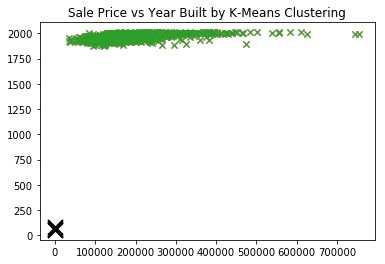

In [185]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3, n_init=100, max_iter=100, algorithm='auto')
kmeans.fit_transform(data1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(3):
    # select only data observations from the applicable cluster
    yr = data.iloc[np.where(labels==i)]
    # plot the data observations
    plt.plot(data['SalePrice'],data['YearBuilt'],'x')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.title("Sale Price vs Year Built by K-Means Clustering")
plt.show()
